In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import custom functions for data selection
from eda_sam import *
print(os.getcwd())

C:\Users\samjd\Documents\flatiron\project_phase2\phase_2_project_chicago-sf-seattle-ds-082420\eda


In [104]:
# NOTE: Year = year for analysis; create: False(read merged file created before)/True(create a merged file)
# Returns df_merged with selected columns from each file
df_merged = consolidate_data(year=2019, create=False)

In [4]:
df_merged['DistrictName'].unique()

array(['DUVALL', 'MAPLE VALLEY', 'SEATTLE', 'KIRKLAND', 'BELLEVUE',
       'KENT', 'REDMOND', 'KING COUNTY', 'AUBURN', 'BLACK DIAMOND',
       'FEDERAL WAY', 'ISSAQUAH', 'SHORELINE', 'KENMORE', 'SAMMAMISH',
       'RENTON', 'LAKE FOREST PARK', 'SeaTac', 'MERCER ISLAND',
       'ENUMCLAW', 'ALGONA', 'CLYDE HILL', 'CARNATION', 'DES MOINES',
       'SNOQUALMIE', 'NORTH BEND', 'COVINGTON', 'NEWCASTLE',
       'WOODINVILLE', 'TUKWILA', 'NORMANDY PARK', 'BOTHELL', 'BURIEN',
       'SKYKOMISH', 'MEDINA', 'YARROW POINT', 'PACIFIC', 'HUNTS POINT',
       'BEAUX ARTS', 'MILTON'], dtype=object)

In [3]:
# # check for columns of na's and zeros
# print((df_rp_sales == 0).all())
# print((df_parcel == 0).all())
# print((df_res_bldg == 0).all())
# print((df_lookup == 0).all())
# print((df_unit_breakdown == 0).all())
# print(df_rp_sales.isna().any())
# print(df_parcel.isna().any())
# print(df_res_bldg.isna().any())
# print(df_lookup.isna().any())
# print(df_unit_breakdown.isna().any())

In [4]:
def maj_min(df, drop=True):
    try:
        df.insert(0, 'Major+Minor', df.Major.astype(str) + df.Minor.astype(str))
        if drop==True:
            df.drop(['Major', 'Minor'], axis=1, inplace=True)
    except:
        print('columns missing')

    return df

In [105]:
df_merged.shape

(30199, 60)

In [6]:
# maj_min(df_res_bldg)
# # maj_min(df_lookup)
# maj_min(df_unit_breakdown)
# maj_min(df_parcel)

,Major+Minor,PropType,Area,SubArea,SqFtLot,WaterSystem,SewerSystem,Access,SeattleSkyline,LakeWashington,...,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
0,785662370,R,31.0,8.0,10300,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
1,99060025,R,42.0,11.0,5000,2,2,4,2,0,...,0,0,0,N,N,0,0,0,N,N
2,286210320,R,44.0,6.0,4280,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
3,264800225,R,28.0,11.0,12100,2,2,4,0,0,...,0,0,0,N,N,0,1,0,N,N
4,68918190,R,4.0,4.0,11554,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616084,375520160,R,37.0,2.0,7798,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616085,7883601970,R,18.0,7.0,3840,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616086,3277801434,R,77.0,6.0,972,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N
616087,955020295,R,43.0,5.0,4488,2,2,4,0,0,...,0,0,0,N,N,0,0,0,N,N


In [106]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [107]:
df_merged.head

<bound method NDFrame.head of          Merged_Key  DocumentDate  SalePrice  PropertyType  PrincipalUse  \
0      213043000120          2019     560000             3             6   
1      940652000630          2019     435000            11             6   
2      615490000010          2019     775000            11             6   
3      347050000040          2019     648500            11             6   
4      937630000695          2019     550000             3             6   
...             ...           ...        ...           ...           ...   
30194  611340000046          2019     850000            11             6   
30195  425400000130          2019     650000            11             6   
30196  398530000006          2019     540000             3             6   
30197  572750000100          2019       3900             1             6   
30198  131350000290          2019     320000            11             6   

       PropertyClass PropType  Area  SubArea   DistrictNa

In [9]:
df_merged.shape

(30199, 60)

In [111]:
len(df_merged.corr().SalePrice)

50

In [12]:
df_corr.values()

dict_values([1.0, -0.05366178063093316, 0.41675028237811107, -0.5302896689704008, -0.04438328483516788, 0.039836343736505284, -0.026075746651678697, 0.022169246272103448, 0.04645068464510288, -0.012147719250701152, 0.07243647682106705, 0.1784487595330894, 0.06247836100866322, -0.00104660267884366, 0.03930629118433383, 0.08514923482152197, -0.019693439840742524, 0.0571963846664656, -0.0010263724533533937, 0.01778442880846847, 0.14776877641571196, -0.01222788604135567, nan, 0.012079438477820805, 0.18252925260629832, 0.11521483986443218, 0.17205454552096558, 0.022843634642795596, 0.16423301354041067, 0.024218389002043084, -0.001520319187197514, -0.00249570911538561, 0.248981687861612, 0.07805983480416225, 0.08731992933577389, 0.10739747933942684, 0.13877514863936205, 0.022593248572945143, 0.05487113391042405, 0.022846607144212182, 0.12267882817541008, 0.08952284689818786, 0.08127826078916989, 0.15119427362393564, 0.030812790032133348, 0.047778835902912646, 0.029698360114049173, 0.03864152

In [95]:
df_merged.corr().SalePrice > 0.12

SalePrice              True
PrincipalUse           True
PropertyClass         False
SeattleSkyline        False
LakeWashington         True
LakeSammamish         False
WfntLocation          False
TidelandShoreland      True
NbrLivingUnits         True
Stories               False
SqFt1stFloor           True
SqFt2ndFloor           True
SqFtTotLiving          True
SqFtTotBasement       False
SqFtFinBasement       False
SqFtGarageAttached    False
SqFtOpenPorch          True
Bedrooms               True
BathHalfCount         False
Bath3qtrCount         False
BathFullCount          True
Name: SalePrice, dtype: bool

In [96]:
# create list of columns with correlations greater than a given percentage
min_percent = 0.12
corr = df_merged.corr()
strong_corrs = []
for key, value in dict(corr.SalePrice).items():
    if abs(value) > min_percent:
        strong_corrs.append(key)
print(strong_corrs)

['SalePrice', 'PrincipalUse', 'PropertyClass', 'LakeWashington', 'TidelandShoreland', 'NbrLivingUnits', 'SqFt1stFloor', 'SqFt2ndFloor', 'SqFtTotLiving', 'SqFtOpenPorch', 'Bedrooms', 'BathFullCount']


In [87]:
# df_merged = consolidate_data(year=2019, create=False)

In [97]:
#create dataframe of strongly correlated column
df_strong_corr = df_merged.drop(df_merged.columns.difference(strong_corrs), 1, inplace=False).copy()
df_strong_corr

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
0,560000,6,8,0,0,1,1930,0,1930,180,3,2
1,435000,6,8,0,0,1,1057,918,1975,45,3,1
2,775000,6,8,0,0,1,1040,0,2080,0,4,1
3,648500,6,8,0,0,1,1390,1910,3300,0,5,2
4,550000,6,8,0,0,1,370,540,1560,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30194,850000,6,8,0,0,1,1146,1264,2896,96,5,2
30195,650000,6,8,0,0,1,940,1100,2040,590,4,2
30196,540000,6,8,0,0,1,1340,0,1340,110,3,1
30197,3900,6,7,0,0,1,910,0,1210,0,3,1


In [98]:
df_strong_corr.isna().any()

SalePrice            False
PrincipalUse         False
PropertyClass        False
LakeWashington       False
TidelandShoreland    False
NbrLivingUnits       False
SqFt1stFloor         False
SqFt2ndFloor         False
SqFtTotLiving        False
SqFtOpenPorch        False
Bedrooms             False
BathFullCount        False
dtype: bool

In [99]:
df_strong_corr.sort_values('SalePrice')

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
17115,-300,6,8,0,0,1,2370,0,3950,110,4,2
314,-100,6,8,0,0,1,1280,1320,3870,0,4,2
12368,5,6,8,0,0,1,610,660,1680,60,3,2
26924,5,6,8,0,0,1,1500,1590,3090,310,4,2
10215,10,6,8,0,0,1,1220,0,1220,180,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27216,20985400,7,2,0,0,2,840,840,1680,0,4,2
29225,30000000,6,8,4,2,1,5220,130,5350,730,3,2
18583,31200000,7,2,0,0,1,1170,0,1170,0,3,1
25722,37500000,6,8,4,2,1,8760,0,9420,410,3,2


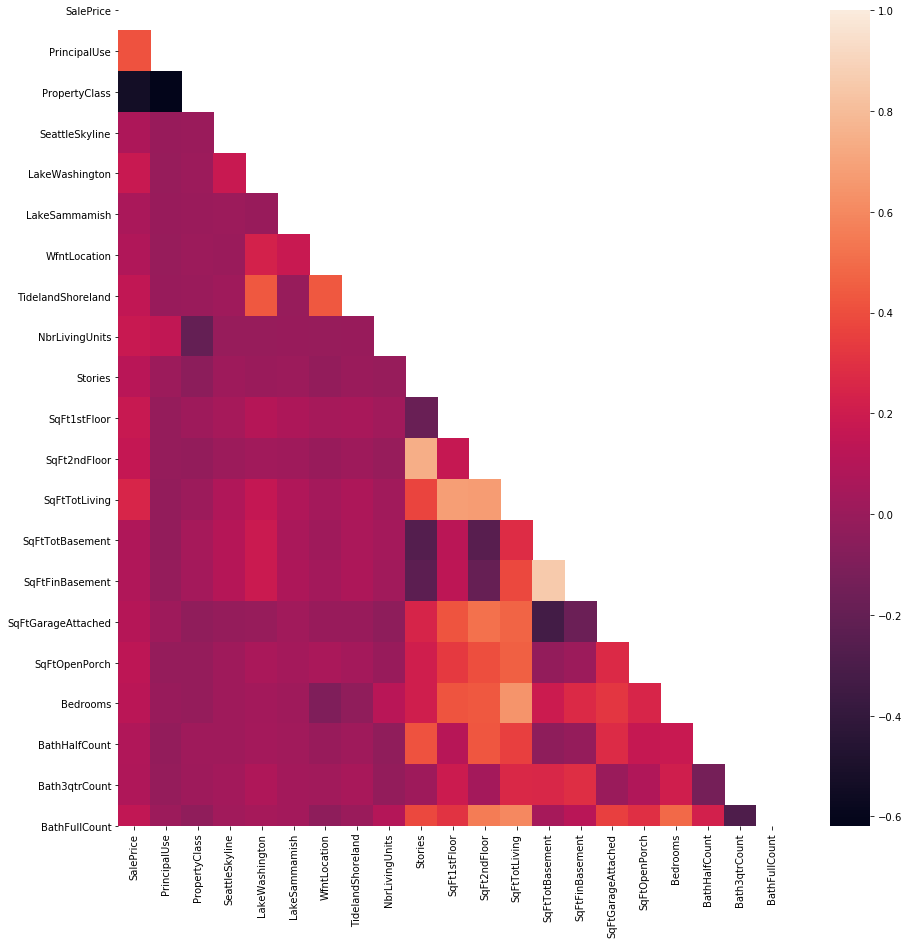

In [100]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=mask, ax=ax1)

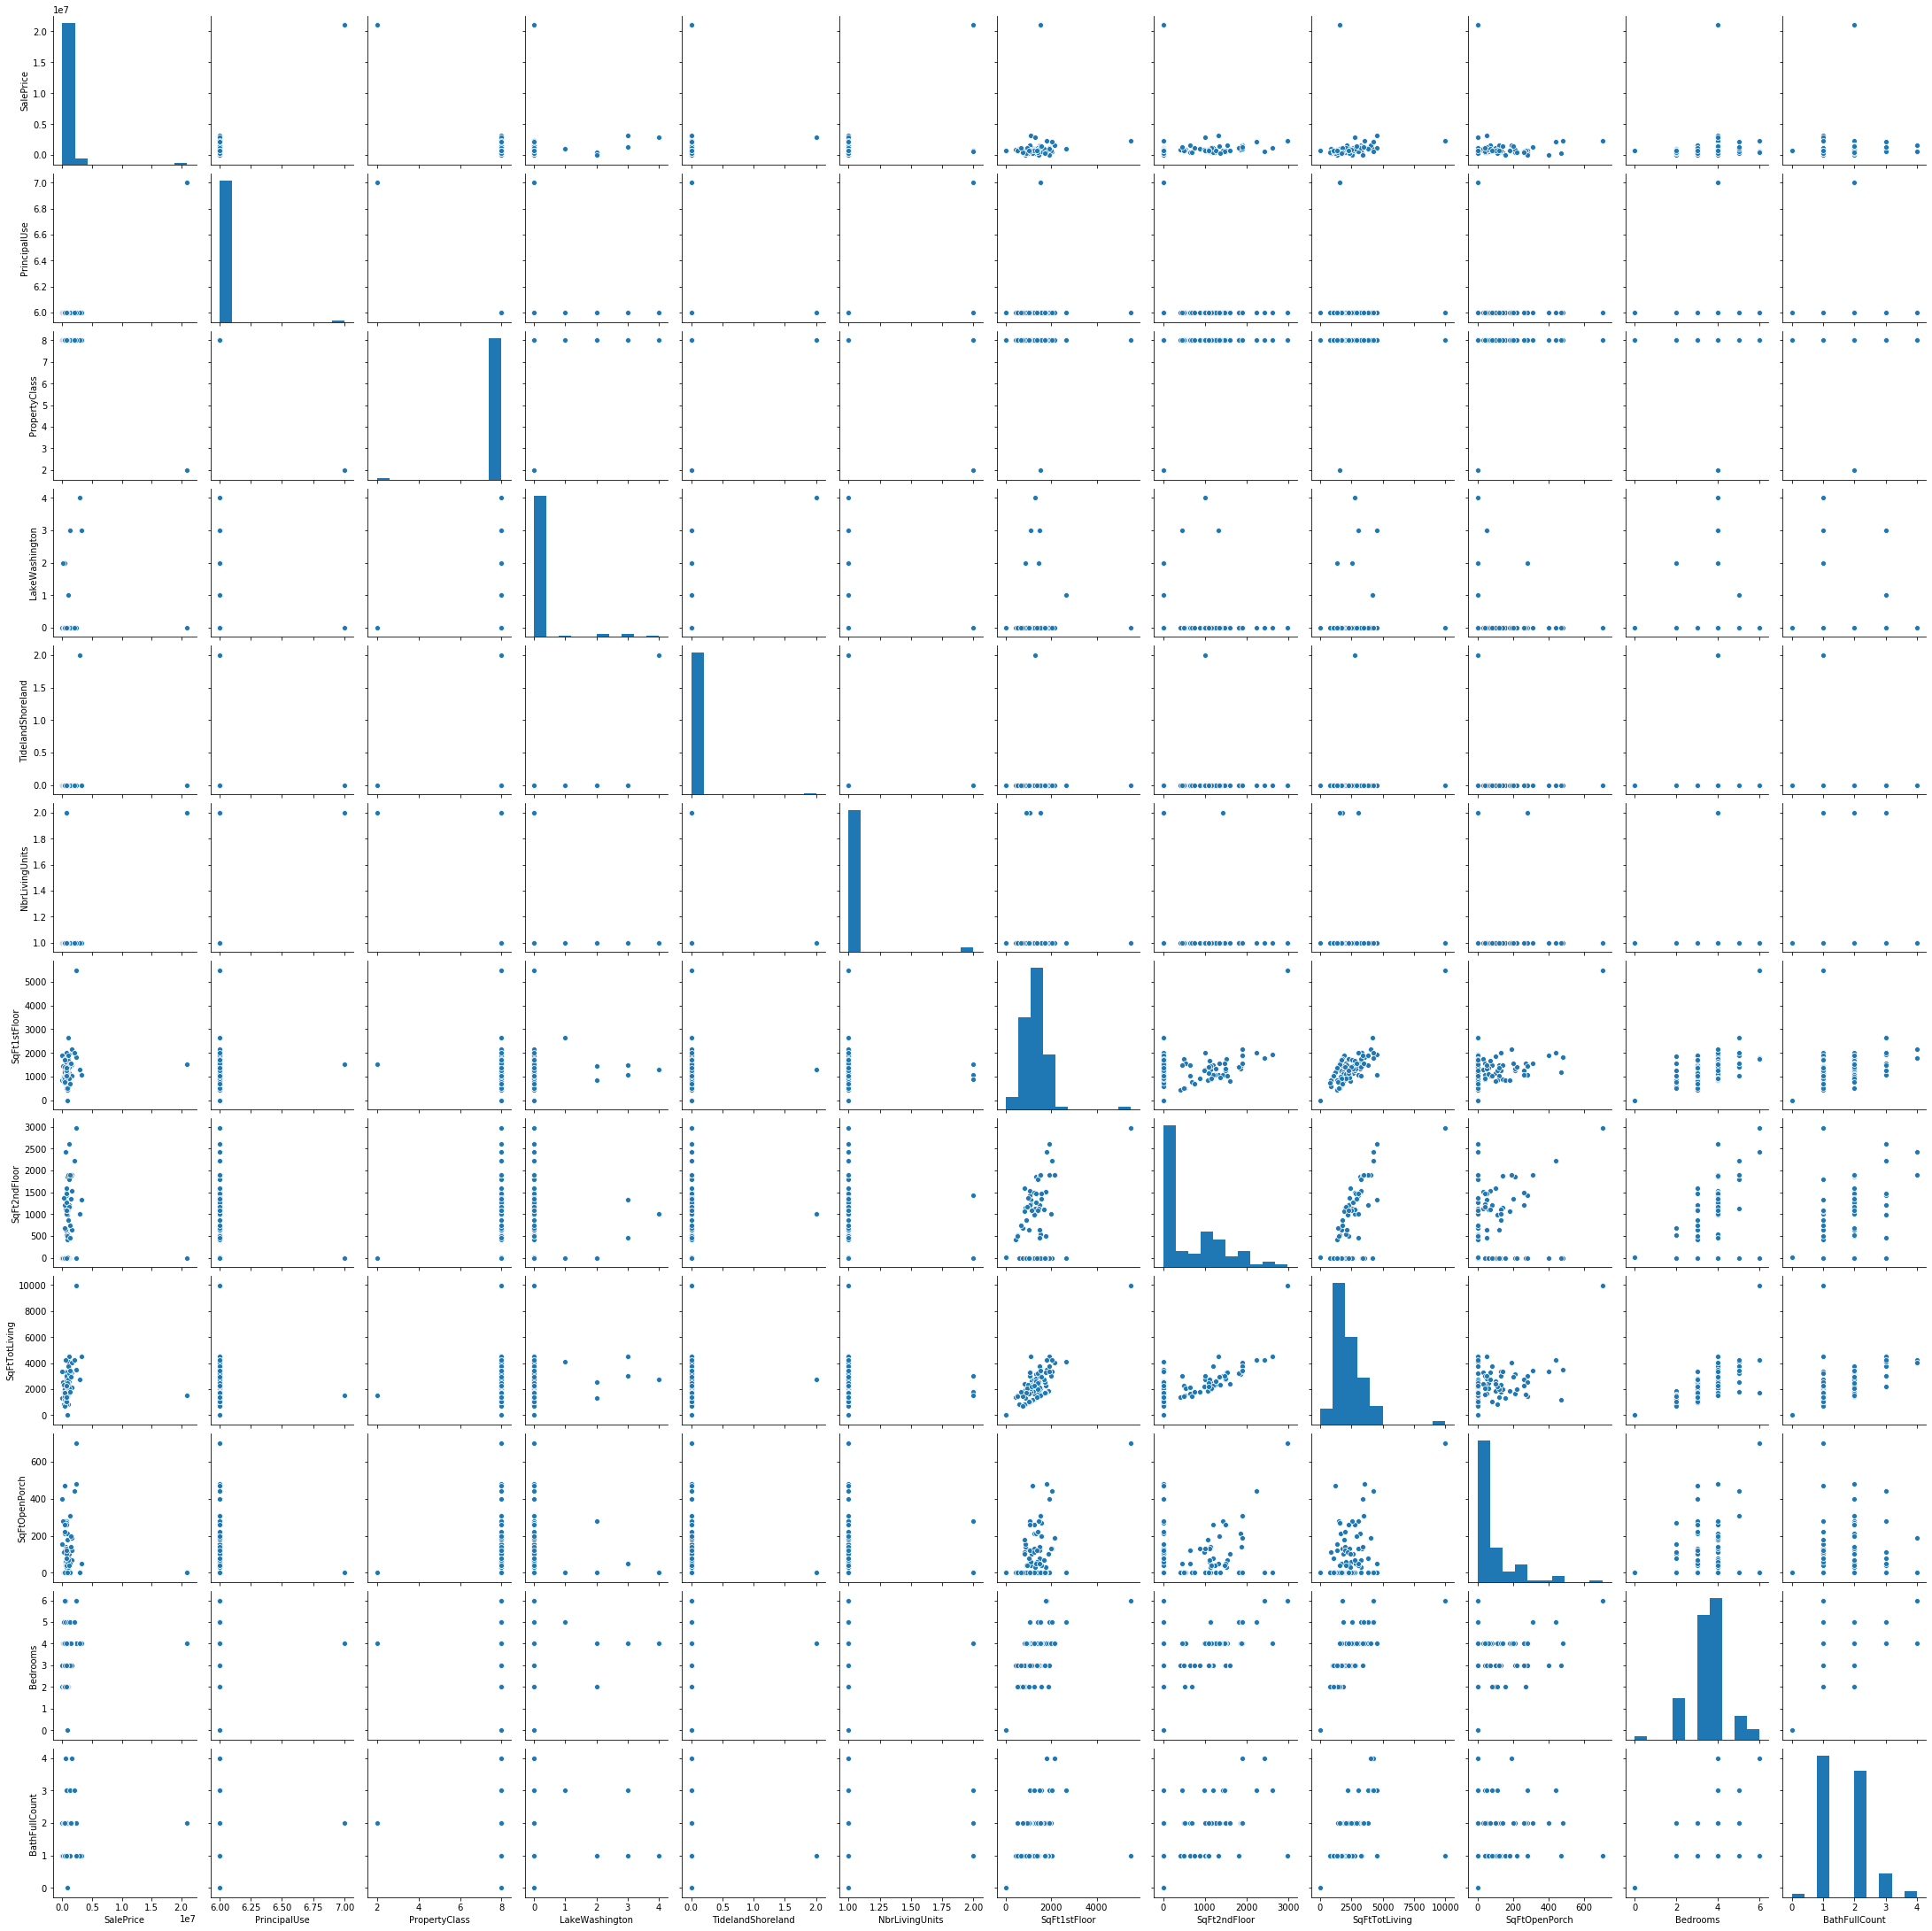

In [101]:
sns.pairplot(df_strong_corr.sample(n=100))

In [108]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [112]:
noise_cols = ['SalePrice', 'AirportNoise', 'TrafficNoise', 'PowerLines', 'OtherNuisances']

In [113]:
#create dataframe of strongly correlated column
df_noise = df_merged.drop(df_merged.columns.difference(noise_cols), 1, inplace=False).copy()
df_noise

,SalePrice,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
0,560000,0,0,N,N
1,435000,0,0,N,N
2,775000,0,0,N,N
3,648500,0,0,N,N
4,550000,0,0,N,N
...,...,...,...,...,...
30194,850000,0,0,N,N
30195,650000,0,0,N,N
30196,540000,0,0,N,Y
30197,3900,3,0,N,N


In [140]:
df_merged.AirportNoise.unique()

array([0], dtype=int64)

In [156]:
# Create df of chosen predictors, 1000 samples
noise_sample = df_noise.sample(10000).dropna()

# some chosen predictors are binary-categorical, convert "Y/N" to "1/0"
for pred in noise_sample:
    # convert all numeric values to floats
    try:
        noise_sample[pred] = noise_sample[pred].astype(int)
        
    # if value is non-numeric, convert to numeric
    except:
        for i in range(len(noise_sample[pred])):
            
            if str(noise_sample[pred].iloc[i]) == 'Y':
                noise_sample[pred].iloc[i] = 1
                
            else:
                noise_sample[pred].iloc[i] = 0
                
# get saleprice samples
target = noise_sample.SalePrice
# choose 1000 samples
preds = noise_sample.drop('SalePrice', axis=1, inplace=False)

In [165]:
preds_scaled = (preds-np.mean(preds))/np.std(preds)

In [166]:
preds_scaled['AirportNoise'].unique()

array([nan])

In [159]:
#drop airport noise, all values null (all zero values in original df)
preds_scaled.drop('AirportNoise', axis=1, inplace=True)

In [160]:
preds_scaled.sort_values('TrafficNoise')

,TrafficNoise,PowerLines,OtherNuisances
3459,-0.377004,-0.104489,-0.171278
10811,-0.377004,-0.104489,-0.171278
1440,-0.377004,-0.104489,-0.171278
20009,-0.377004,-0.104489,-0.171278
16111,-0.377004,-0.104489,-0.171278
...,...,...,...
25785,4.787440,-0.104489,-0.171278
15256,4.787440,-0.104489,-0.171278
6073,4.787440,-0.104489,-0.171278
13697,4.787440,-0.104489,-0.171278


In [161]:
predictors = sm.add_constant(preds_scaled)
model = sm.OLS(target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.144
Date:                Tue, 29 Sep 2020   Prob (F-statistic):              0.330
Time:                        14:43:43   Log-Likelihood:            -1.5500e+05
No. Observations:               10000   AIC:                         3.100e+05
Df Residuals:                    9996   BIC:                         3.100e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.645e+05    1.3e+04     66.264      0.000    8.39e+05     8.9e+05
TrafficNoise   -1.563e+04   1.31e+04     -1.197      0.231   -4.12e+04    9960.546
PowerLines     -1.784e+04    1.3e+04     -1.367      0.172   -4.34e+04    7739.685
OtherNuisances -5248.2015   1.31e+04     -0.402      0.688   -3.08e+04    2.03e+04
==============================================================================
Omnibus:                    17015.356   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12814774.572
Skew:                          11.893   Prob(JB):                         0.00
Kurtosis:                     176.752   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Addressing Point 6, ostensibly no correlation between nuisance and property values